## EDA and Fraud Detection

### Problem Formulation
Due to the private nature of financial data, there is a lack of publicly available datasets that can be used for analysis. In this project, a synthetic dataset, publicly available on Kaggle, generated using a simulator called PaySim is used. The dataset was generated using aggregated metrics from the private dataset of a multinational mobile financial services company.

There are 6362620 transactions, The data set has 11 attributes which include is

- Type of transactions
- Amount transacted
- Customer ID and Recipient ID
- Old and New balance of Customer and Recipient
- Time step of the transaction
- Whether the transaction was fraudulent or not

### Methodology

- **General Overview:** Have a General Overview of the data
- **EDA:** Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
- **Data Preprocessing:** With the information gained after performing EDA, Preprocess the Data accordingly
- **Model Building:** Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
- **Model Performance:** Assess the Performance of the Model on the Testing data set
- **Predictions:** Make Predictions on the Testing data set

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [2]:
data=pd.read_csv('Fraud.csv')

#### Viewing Dataframe

In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### Checking count of Fraud and Non-Fraud Transactions

In [4]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [5]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

#### Checking for Null values in dataset

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### There are no null values in the data

In [7]:
data.duplicated().sum()

0

#### There are no duplicate values in the data

In [8]:
print(list(data.columns))

# shape of data
print(f'The dataset has shape {data.shape}')

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
The dataset has shape (6362620, 11)


#### Statistical Summary of the data

In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Proportion of type of Transactions

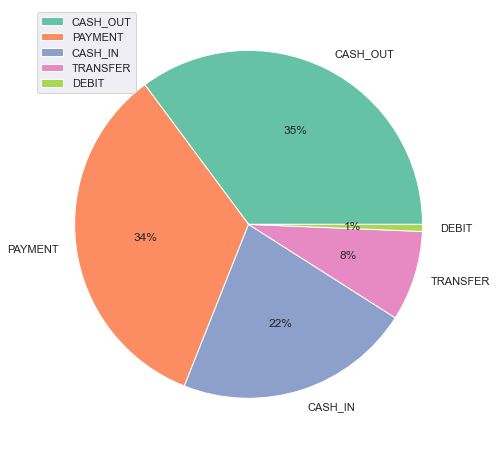

In [11]:
type = data['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

#### Count of Fraud and Non-Fraud Transactions in each type of Transaction

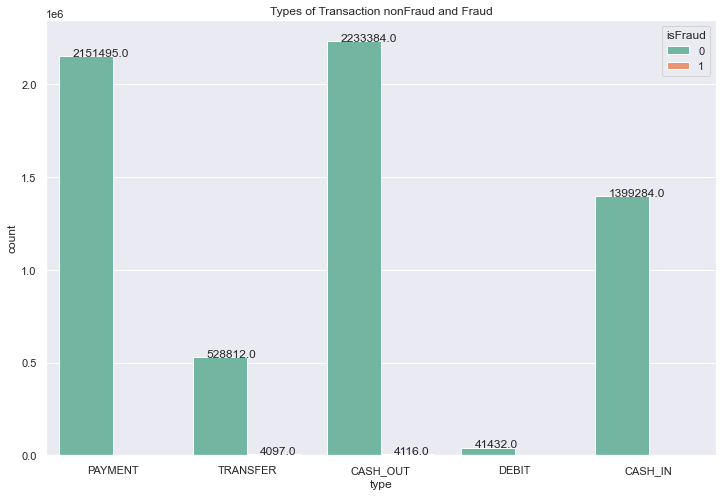

In [12]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = data)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* __Transaction types TRANSFER and CASH_OUT only have FRAUD Transactions.__
* __DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.__
* __No of Fraud transactions of TRANSFER type are very close to No of CASH_OUT FRAUD transactions. Probably modus operadi of FRAUD transactions is by transferring funds to a specific account and then CASHING OUT from those accounts. We will check this further.__

In [13]:
data1=data[(data['isFraud']==1) & (data['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: nameDest, Length: 4097, dtype: int64

In [14]:
data2=data[(data['isFraud']==1) & (data['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: nameOrig, Length: 4116, dtype: int64

There are no specific accounts from which fraud transactions are carried out . Hence we disregard our suspicioun.
So these account name features are not useful for us in modelling as is.

Let's check further

In [15]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [16]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.

We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), which would be the first character for each value under nameOrig and nameDest.

We will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [17]:
# adding feature type1
data_new = data.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"Type2"] = "MM"

### Plotting Pairplot

### Visualizing Numeric variables against Fraud using Boxplots.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

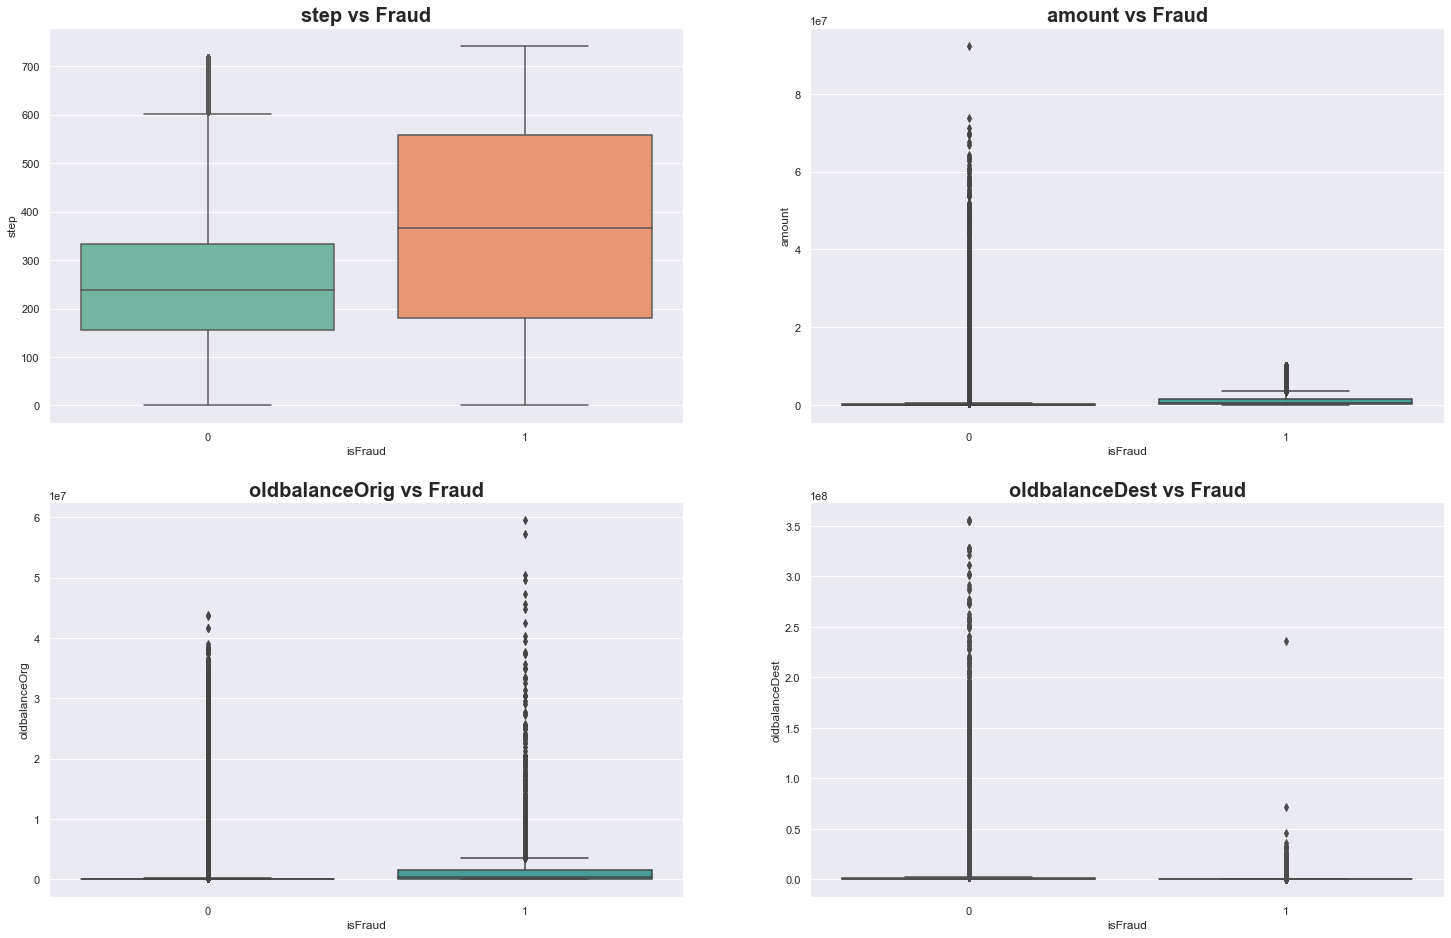

In [18]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

- Median amount for fraud transactions is greater than Non Fraud transactions.
- Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

In [19]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [20]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: Type2, dtype: int64


From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer).

### Looking balances before and after the transaction

In [21]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


Most, if not all, of the observations have errors in calculating the balances before and after the transaction.

Since We don't know why these errors are caused, We cannot treat them.

We will not process them and use them as is for our modelling purpose.

### Looking at Time

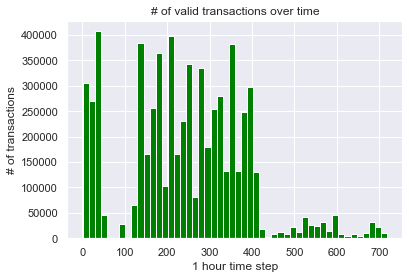

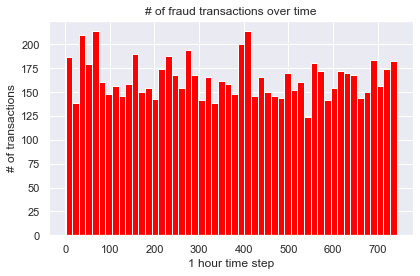

In [22]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

- A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.
- The frequency at which fraudulent transactions occur does not seem to change much over time.

Let's see what the patterns look like over any particular, day of the week or hour of the day.

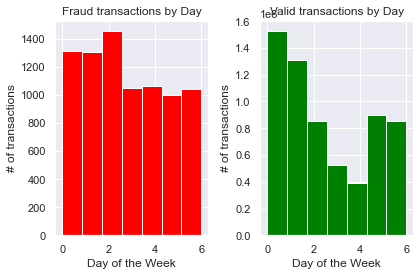

In [23]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, there is little evidence to suggest that fraudulent transactions occur at particular days of the week.

While valid transactions occur less on some two consecutive days of the week.

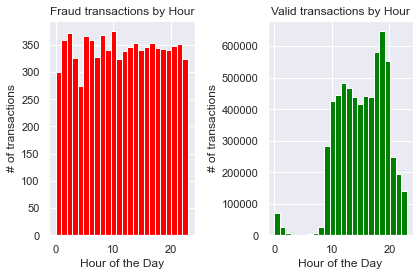

In [24]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

We observe that from hour 0 to hour 9  valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

In response to this, We1m will create another feature HourOfDay, which is the step column with each number taken to modulo 24.

In [25]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))


Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud Type2  \
0  M1979787155             0.0             0.0        0               0    CM   
1  M2044282225             0.0             0.0        0               0    CM   
2   C553264065             0.0             0.0        1               0    CC   
3    C38997010         21182.0             0.0        1               0    CC   
4  M1230701703             0.0             0.0        0               0    CM   

   HourOfDay  
0          1  
1          1

#### We will drop columns irrelevant for our modelling. These are isFlaggedFraud, nameOrig, nameDest columns.

In [26]:
data_new = data_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)

### Pairplot of Variables

### Handling Categorical Variables

In [27]:
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)

### Train-Test Split Standardizing Data

In [28]:
X = data_new.drop("isFraud",1)
y = data_new.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Model Selection

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

### Performing Undersampling of Train Data
- **We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest and Neural Networks classified all points as non-Fraud and failed to detect any Fraud transaction**
- **Our training data is in millions so models will still learn train data well as the undersampled data will still contain enough number of transactions**

In [63]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [64]:
X_res, y_res = rus.fit_resample(X_train, y_train)

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [74]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9744589493007597
Confusion Matrix:
 [[1548840   39798]
 [    829    1188]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   1588638
           1       0.03      0.59      0.06      2017

    accuracy                           0.97   1590655
   macro avg       0.51      0.78      0.52   1590655
weighted avg       1.00      0.97      0.99   1590655

Confusion Matrix Train:
 [[4646917  118852]
 [   2610    3586]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   4765769
           1       0.03      0.58      0.06      6196

    accuracy                           0.97   4771965
   macro avg       0.51      0.78      0.52   4771965
weighted avg       1.00      0.97      0.99   4771965

Precision: 0.028985507246376812
Recall: 0.5889935547843331
F1: 0.05525195916563961
Area under precision (AUC) Recall: 0.017593445902683212


### Bernoulli Naive Bayes

In [78]:
clf = BernoulliNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_NB = confusion_matrix(y_test,y_pred)
CR_NB = classification_report(y_test,y_pred)
CM_NBtrain = confusion_matrix(y_train,y_predtrain)
CR_NBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_NB)
print("Classification Report:\n",CR_NB)
print("Confusion Matrix Train:\n",CM_NBtrain)
print("Classification Report Train:\n",CR_NBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9227708082519466
Confusion Matrix:
 [[1466463  122175]
 [    670    1347]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1588638
           1       0.01      0.67      0.02      2017

    accuracy                           0.92   1590655
   macro avg       0.51      0.80      0.49   1590655
weighted avg       1.00      0.92      0.96   1590655

Confusion Matrix Train:
 [[4397283  368486]
 [   2256    3940]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   4765769
           1       0.01      0.64      0.02      6196

    accuracy                           0.92   4771965
   macro avg       0.51      0.78      0.49   4771965
weighted avg       1.00      0.92      0.96   4771965

Precision: 0.010904940010686355
Recall: 0.6678235002478929
F1: 0.021459466779247885
Area under precision (AUC) Recall: 0.007703785338347829


### Multinomial Naive Bayes

In [79]:
clf = MultinomialNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_MNB = confusion_matrix(y_test,y_pred)
CR_MNB = classification_report(y_test,y_pred)
CM_MNBtrain = confusion_matrix(y_train,y_predtrain)
CR_MNBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_MNB)
print("Classification Report:\n",CR_MNB)
print("Confusion Matrix Train:\n",CM_MNBtrain)
print("Classification Report Train:\n",CR_MNBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9163319513030795
Confusion Matrix:
 [[1456562  132076]
 [   1011    1006]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1588638
           1       0.01      0.50      0.01      2017

    accuracy                           0.92   1590655
   macro avg       0.50      0.71      0.49   1590655
weighted avg       1.00      0.92      0.96   1590655

Confusion Matrix Train:
 [[4369045  396724]
 [   3106    3090]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   4765769
           1       0.01      0.50      0.02      6196

    accuracy                           0.92   4771965
   macro avg       0.50      0.71      0.49   4771965
weighted avg       1.00      0.92      0.96   4771965

Precision: 0.0075592491847131845
Recall: 0.49876053544868615
F1: 0.01489278232999504
Area under precision (AUC) Recall: 0.0044058423976032195

### Stochastic Gradient Classifier

In [81]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_res, y_res)
y_pred=clf.predict(X_test)
y_predtrain=clf.predict(X_train)
SGDClassifier(max_iter=5)
CM_svc = confusion_matrix(y_test,y_pred)
CR_svc = classification_report(y_test,y_pred)
CM_svctrain = confusion_matrix(y_train,y_predtrain)
CR_svctrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_svc)
print("Classification Report:\n",CR_svc)
print("Confusion Matrix Train:\n",CM_svctrain)
print("Classification Report Train:\n",CR_svctrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9680301511012759
Confusion Matrix:
 [[1538571   50067]
 [    786    1231]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   1588638
           1       0.02      0.61      0.05      2017

    accuracy                           0.97   1590655
   macro avg       0.51      0.79      0.51   1590655
weighted avg       1.00      0.97      0.98   1590655

Confusion Matrix Train:
 [[4616852  148917]
 [   2443    3753]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   4765769
           1       0.02      0.61      0.05      6196

    accuracy                           0.97   4771965
   macro avg       0.51      0.79      0.52   4771965
weighted avg       1.00      0.97      0.98   4771965

Precision: 0.023997036921517407
Recall: 0.6103123450669311
F1: 0.04617837381599925
Area under precision (AUC) Recall: 0.01513982394167458


### RandomForestClassifier

A random forest is an algorithm that generates several decisions trees and pools the results of each tree to make a more robust prediction.

Another great thing about Random Forest is that We can assign weights to each class to reduced the bias of the model towards the majority class.

In [82]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)


RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9997372151723661
Confusion Matrix:
 [[1588611      27]
 [    391    1626]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588638
           1       0.98      0.81      0.89      2017

    accuracy                           1.00   1590655
   macro avg       0.99      0.90      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4765768       1]
 [    122    6074]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765769
           1       1.00      0.98      0.99      6196

    accuracy                           1.00   4771965
   macro avg       1.00      0.99      0.99   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.9836660617059891
Recall: 0.8061477441745166
F1: 0.8861035422343325
Area under precision (AUC) Recall: 0.79322598735336

**When using entire training data for training RandomForest model the model classifies only a very small fraction as Fraud but misclassifies more than 20% Fraud transactions as non-Fraud which is not desirable. Hence we train our RandomForest Classifier to minimize misclassification of Fraud transactions allowing misclassification of non-Fraud transactions to some extent.** 

In [83]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,n_jobs=-1)


RF.fit(X_res, y_res)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9958268763496798
Confusion Matrix:
 [[1582046    6592]
 [     46    1971]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588638
           1       0.23      0.98      0.37      2017

    accuracy                           1.00   1590655
   macro avg       0.62      0.99      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4746229   19540]
 [      5    6191]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765769
           1       0.24      1.00      0.39      6196

    accuracy                           1.00   4771965
   macro avg       0.62      1.00      0.69   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.23017634006773327
Recall: 0.9771938522558254
F1: 0.3725897920604915
Area under precision (AUC) Recall: 0.2249558233534

### Artificial Neural Networks

In [39]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
149124/149124 [==============================] - 365s 2ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 2/5
149124/149124 [==============================] - 368s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 3/5
149124/149124 [==============================] - 372s 2ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 4/5
149124/149124 [==============================] - 371s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 5/5
149124/149124 [==============================] - 369s 2ms/step - loss: 0.0027 - accuracy: 0.9994


In [41]:
Y_pred1=model.predict(X_test)

149124/149124 [==============================] - 289s 2ms/step


In [42]:
Y_pred=np.where(Y_pred1<0.44,0,1)

In [49]:
y_predtrain1=model.predict(X_train)

149124/149124 [==============================] - 274s 2ms/step


In [58]:
y_predtrain=np.where(y_predtrain1<0.38,0,1)

In [59]:
CM_NN = confusion_matrix(y_test,Y_pred)
CR_NN = classification_report(y_test,Y_pred)
CM_NNtrain = confusion_matrix(y_train,y_predtrain)
CR_NNtrain = classification_report(y_train,y_predtrain)
ROC_AUC_SCORENN= roc_auc_score(y_test, Y_pred)
print("Confusion Matrix:\n",CM_NN)
print("Classification Report:\n",CR_NN)
print("Confusion Matrix Train:\n",CM_NNtrain)
print("Classification Report Train:\n",CR_NNtrain)
print("Area Under Curve:",ROC_AUC_SCORENN)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))

Confusion Matrix:
 [[1588540      98]
 [    681    1336]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588638
           1       0.93      0.66      0.77      2017

    accuracy                           1.00   1590655
   macro avg       0.97      0.83      0.89   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train:
 [[4765254     515]
 [   1894    4302]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765769
           1       0.89      0.69      0.78      6196

    accuracy                           1.00   4771965
   macro avg       0.95      0.85      0.89   4771965
weighted avg       1.00      1.00      1.00   4771965

Area Under Curve: 0.8311540840798798
Precision: 0.9316596931659693
Recall: 0.6623698562221121
F1: 0.7742683280208635


### Observations and Conclusion

- **When we compare confusion matrices of all the classifiers we observe that RandomForest Classifier does a very good work detecting Fraud Transactions leaving only around 3% of Fraud transactions from Test data undetected and when checked on Train data it leaves 0.05% Fraud transactions undetected.** 
- **The closest model in detecting fraud transactions is Bernoulli Naive Bayes but it still leaves more Fraud transactions from Train and Test data undetected and also it misclassifies considerable Non-Fraud transactions as Fraud which is very undesirable.**
- **RandomForest does misclassify some nonFraud transactions as Fraud but it is less than 0.5% of all non Fraud transactions which is fine if less than 0.5% of nonFraud transactions fail in an attempt to detect 97% Fraud transactions.**

### Thus, RandomForest Classifier performs best in detecting Fraud Transactions.

#### Confusion Matrix and Classification Report of RandomForest Classifier model

In [69]:
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)

Confusion Matrix:
 [[1582175    6463]
 [     58    1959]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588638
           1       0.23      0.97      0.38      2017

    accuracy                           1.00   1590655
   macro avg       0.62      0.98      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4746210   19559]
 [      3    6193]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765769
           1       0.24      1.00      0.39      6196

    accuracy                           1.00   4771965
   macro avg       0.62      1.00      0.69   4771965
weighted avg       1.00      1.00      1.00   4771965

